# House price prediction using ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.datasets import fetch_openml

fetch_openml is a function in sklearn.datasets module that allows you to easily load datasets from OpenML, 
a platform for sharing datasets, models, and experiments in machine learning. 
This function is particularly useful for retrieving benchmark datasets for machine learning tasks
without the need to manually download or preprocess them.

In [85]:
house_boston=fetch_openml(name='boston', version=1,parser='auto')
print(house_boston)

{'data':         CRIM    ZN  INDUS CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31    0  0.538  ...    1  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07    0  0.469  ...    2  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07    0  0.469  ...    2  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18    0  0.458  ...    3  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18    0  0.458  ...    3  222.0     18.7  396.90   5.33
..       ...   ...    ...  ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93    0  0.573  ...    1  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93    0  0.573  ...    1  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   7.88

[506 rows x 13 columns], 'target': 0      

In [4]:
df=pd.DataFrame(house_boston.data)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [5]:
df['price']=house_boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


house_boston.data: Contains the feature data (e.g., number of rooms, crime rate, etc.) as a NumPy array or DataFrame (if as_frame=True is used).
house_boston.target: Contains the target values (in this case, housing prices) as a separate array.

Features Explanation
---------------------------------------------
* CRIM (Per capita crime rate by town):
This indicates the crime rate in the town on a per-capita basis. Higher values imply higher crime rates.
* ZN (Proportion of residential land zoned for lots over 25,000 sq. ft.):
Represents the percentage of land zoned for large residential plots (greater than 25,000 square feet).

* INDUS (Proportion of non-retail business acres per town):
Indicates the proportion of land used for industrial or non-retail purposes, like factories.
* CHAS (Charles River dummy variable):
A binary variable:
1: The tract bounds the Charles River.
0: The tract does not.
* NOX (Nitric oxides concentration (parts per 10 million)):
Measures the level of air pollution in the area. Higher values indicate worse air quality.
* RM (Average number of rooms per dwelling):
Represents the average number of rooms in residential homes in the area.
* AGE (Proportion of owner-occupied units built before 1940):
Indicates the percentage of housing units that are relatively old (built before 1940).
* DIS (Weighted distances to five Boston employment centers):
A measure of how far the area is from major employment hubs. Larger values imply more distance.
* RAD (Index of accessibility to radial highways):
Indicates the ease of access to radial highways. Higher values suggest better accessibility.
* TAX (Full-value property-tax rate per $10,000):
Represents the property tax rate for the town. Higher values indicate higher taxes.
* PTRATIO (Pupil-teacher ratio by town):
The ratio of students to teachers in local schools. Lower values suggest better education quality.
* B (1000(Bk - 0.63)^2 where Bk is the proportion of Black individuals by town):
A measure of racial diversity, capturing the proportion of Black residents in the town.
* LSTAT (% lower status of the population):

Represents the percentage of the population considered to be of lower socioeconomic status.
------------------------------------
Target Variable
* price (Median value of owner-occupied homes in $1000s):
This is the dependent variable or the target in regression tasks. It represents the median price of houses in the area (in thousands of dollars)

In [6]:
# check the automatic evaluation of dataset:

In [7]:
df.shape

(506, 14)

In [8]:
# 506 rows and 14 columns

In [9]:
df.size

7084

In [10]:
# altogether 7084 data i.e rows x columns

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


* Crime rate is very low (0.00632).
* 18% of the land is zoned for large lots.
* Only 2.31% of land is industrial.
* The area does not border the Charles River.
* Air quality is moderate (NOX = 0.538).
* Average number of rooms per dwelling is 6.575.
* Most houses are relatively old (65.2% built before 1940).
* It’s moderately far from employment centers (DIS = 4.09).
* It has low access to highways (RAD = 1).
* Property tax rate is 296 per $10,000.
* Student-teacher ratio is favorable (15.3).
* The area is racially diverse (B = 396.9).
* Only 4.98% of the population is of lower socioeconomic status.
* The median home price is 24,000.

In [12]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [20]:
# since two of them are categorical and except those all are numerical .
# but here two of them should not be categorical which is mistakenly done.
# why? cause you can see those data, they are all continous data.
# change those datatypes of two columns to numerical

In [21]:
df['CHAS']=df['CHAS'].astype('float64')
df['RAD']=df['RAD'].astype('float64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [23]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [15]:
# no any null values present in the dataset.

In [24]:
df.duplicated().sum()

0

In [17]:
# no any duplicated values.

In [25]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* Overall Explanation of the only one column INDUS
* Central Tendency: The mean (11.1411.14) is close to the median (9.69), indicating that most towns fall within this range.
* Variation: The large standard deviation (6.86) and wide interquartile range (Q3 - Q1 = 18.10− 5.91=12.91) 
    reflect substantial differences in industrial land use across towns.
* Distribution Shape: Right-skewed, influenced by a few towns with very high industrial land use.
* Susceptibility: Outliers on the high end (e.g., towns with extreme industrial proportions) can affect analyses 
    and model predictions.

In [26]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
price      1.108098
dtype: float64

* CRIM	5.223149	Highly right-skewed. Indicates that while most towns have low crime rates, a few have extremely high crime rates. Outliers dominate this feature.
* ZN	2.225666	Right-skewed. Most towns have low zoning for large lots, but a few towns have very high zoning proportions, creating a long right tail.
* INDUS	0.295022	Slightly right-skewed. Distribution is fairly symmetric with a mild right skew caused by a few towns with high industrial land proportions.
* CHAS	3.405904	Highly right-skewed. Since CHAS is a binary variable (0 or 1), this skewness reflects the fact that most towns do not border the Charles River (CHAS = 0).
* NOX	0.729308	Moderately right-skewed. Most towns have relatively low NOX levels, but a few have high air pollution levels.
* RM	0.403612	Slightly right-skewed. Most towns have average room counts close to the mean, with some towns having more rooms, creating a mild right tail.
* AGE	-0.598963	Moderately left-skewed. Most towns have older houses, but some have newer houses, pulling the tail to the left.
* DIS	1.011781	Right-skewed. Many towns are closer to employment centers, but some towns are far away, creating a long right tail.
* RAD	1.004815	Right-skewed. Most towns have low accessibility to radial highways, but some towns have very high accessibility, creating a right tail.
* TAX	0.669956	Moderately right-skewed. Most towns have average or low property tax rates, but a few towns have extremely high taxes.
* PTRATIO	-0.802325	Moderately left-skewed. Most towns have higher pupil-teacher ratios, but a few towns have low ratios, pulling the distribution to the left.
* B	-2.890374	Highly left-skewed. Indicates that the proportion of Black individuals in some towns is extremely high, but most towns have lower values.
* LSTAT	0.906460	Moderately right-skewed. Indicates that most towns have a low percentage of the lower-status population, with a few towns having a high proportion.
* price	1.108098	Right-skewed. Most homes have average or low prices, but a few very expensive homes create a right tail.

<Axes: >

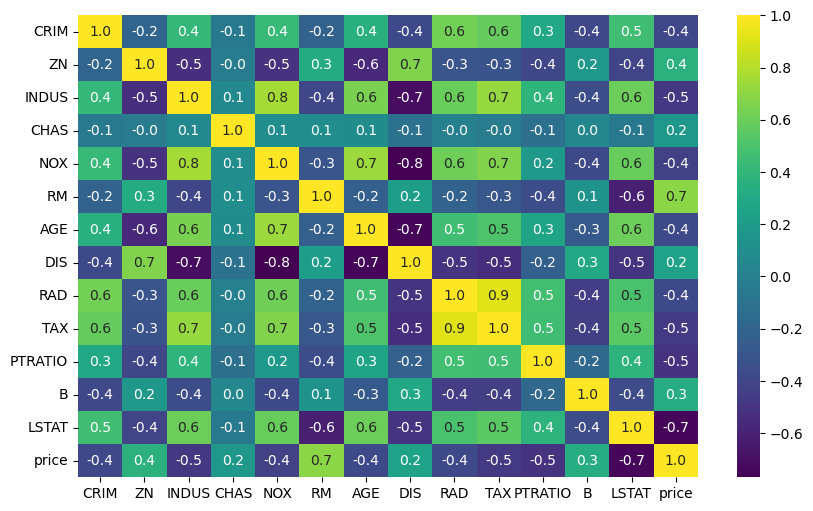

In [30]:
cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,cbar=True,cmap='viridis',fmt='.1f')

* CRIM	Negative	Higher crime rates typically reduce housing prices.
* ZN	Positive	Higher zoning for large residential lots usually indicates wealthier areas, leading to higher prices.
* INDUS	Negative	Higher industrial land use often correlates with lower housing prices, reflecting less desirable neighborhoods.
* CHAS	Positive	Homes near the Charles River are generally more expensive.
* NOX	Negative	Higher pollution levels reduce housing prices.
* RM	Positive	More rooms per dwelling strongly correlate with higher prices.
* AGE	Negative	Older housing stock often correlates with lower prices unless the area is historic or desirable.
* DIS	Positive	Greater distance from employment centers correlates with higher prices in suburban areas.
* RAD	Negative	High accessibility to highways often correlates with noise and pollution, reducing housing prices.
* TAX	Negative	Higher property taxes may discourage buyers, leading to lower prices.
* PTRATIO	Negative	Higher pupil-teacher ratios (worse school quality) lower housing prices.
* B	Positive	Areas with higher proportions of Black residents have historically had lower prices due to systemic biases.
* LSTAT	Negative	Higher percentages of lower socioeconomic status populations are associated with lower housing prices.

* Criteria for Selecting Features
* High Correlation with price:
Keep features that have a strong correlation with price (positive or negative). These are the most predictive for modeling housing prices.
* Low Multicollinearity:
If two features are highly correlated with each other (multicollinearity), keep only one of them to avoid redundancy. Features with high correlation to price should take precedence.
* Domain Knowledge:
Certain features might have practical significance, even if their correlation with price is weak (e.g., CHAS indicating proximity to the Charles River).

* Correlation with price:
* CRIM	Negative	Keep. Low crime rates are associated with higher prices.
* ZN	Positive	Keep. Indicates zoning for large lots, important for upscale areas.
* INDUS	Negative	Remove. Often redundant due to correlation with other variables like NOX.
* CHAS	Positive (binary)	Keep. Significant for proximity to the Charles River.
* NOX	Negative	Keep. Pollution strongly impacts housing desirability.
* RM	Positive	Keep. Number of rooms is a strong predictor of price.
* AGE	Negative	keep. Often correlated with NOX or DIS, adding redundancy.
* DIS	Positive	Keep. Indicates proximity to employment centers, important for suburban areas.
* RAD	Weak Positive	Remove. Often correlated with TAX, adding little unique value.
* TAX	Negative	Remove. Highly correlated with RAD, making it redundant.
* PTRATIO	Negative	Keep. Education quality is crucial for homebuyers.
* B	Positive	Remove. High negative skewness and weak predictive power.
* LSTAT	Negative	Keep. A strong predictor of price as it reflects socioeconomic status.



----------------------------------------------
* 1. Weak Correlation:
Correlation between -0.1 to 0.1: Very weak or no correlation.
Decision: Drop. If the correlation is so weak, the feature is unlikely to have predictive power and should be considered for removal.
* 2. Moderate Correlation:
Correlation between -0.3 to -0.6: Moderate correlation (negative or positive).
Decision: Consider keeping. Features with moderate correlations still provide valuable insights and might be predictive for your model, especially if they have practical significance.
However, you may want to assess feature importance (using techniques like feature selection or model-based selection).
* 3. Strong Correlation:
Correlation between -0.7 to -1: Strong negative correlation.
Decision: Keep with caution. These features are quite predictive, but if there is multicollinearity with other features (i.e., they are highly correlated with other features in the dataset), one of them may need to be dropped to avoid redundancy.

In [73]:
X=df.drop(columns='price',axis=1)
y=df['price']

In [70]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


In [71]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=3)

In [75]:
model=XGBRegressor(base_score=0.5)

In [76]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [77]:
model.predict(X_test)

array([47.12652  , 18.56657  , 15.08858  , 35.78557  , 23.827991 ,
       21.28477  , 14.590143 ,  6.858219 , 21.004034 , 18.089174 ,
       16.20555  , 36.782642 , 35.988045 , 27.016636 ,  6.4415083,
        9.223822 , 20.089514 , 14.397525 , 14.307404 , 23.467016 ,
       26.791563 , 46.910915 , 23.940714 , 24.304827 , 11.376767 ,
       25.362452 , 18.394358 , 22.810698 , 20.962402 , 21.924267 ,
       15.4296465, 31.5296   , 20.062382 , 18.543037 , 19.124392 ,
       12.48288  , 21.965492 , 33.48862  , 17.569784 , 22.374992 ,
       16.7772   ,  9.363647 , 22.362144 , 14.35197  , 20.117651 ,
       26.081774 , 20.980822 , 18.748337 , 25.704447 , 20.286745 ,
       27.357885 ], dtype=float32)

In [78]:
y_pred_train=model.predict(X_train)

In [79]:
print("r2 score is",r2_score(y_pred_train,y_train))

r2 score is 0.9999921021844749


In [80]:
y_pred_test=model.predict(X_test)
print("r2 score is",r2_score(y_pred_test,y_test))

r2 score is 0.9276018109475997


* R² = 0.0 to 0.3: Typically poor performance.
* R² = 0.3 to 0.7: Decent to good in many real-world problems.
* R² = 0.7 to 0.9: Very good, especially for machine learning or regression problems.
* R² = 1: Perfect fit, but often a sign of overfitting unless the data is very well-defined and simple.

In [81]:
print("mean absolute score for train data is",mean_absolute_error(y_pred_train,y_train))
print("mean absolute score for test data is",mean_absolute_error(y_pred_test,y_test))

mean absolute score for train data is 0.01813137012523612
mean absolute score for test data is 1.8148769603056065


* MAE = 0: Perfect prediction (very rare in real-world problems).
* MAE > 0: Higher MAE means worse predictions.

In [82]:
input_=(0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98)
input_ar=np.asarray(input_)
input_reshap=input_ar.reshape(1,-1)

In [83]:
result=model.predict(input_reshap)
print("Price of house is ",result)

Price of house is  [24.009895]
